# In America, we drive on the Right. On La Jolla Village Drive, we drive on what's left.

# What affects how fast potholes get fixed in San Diego County?

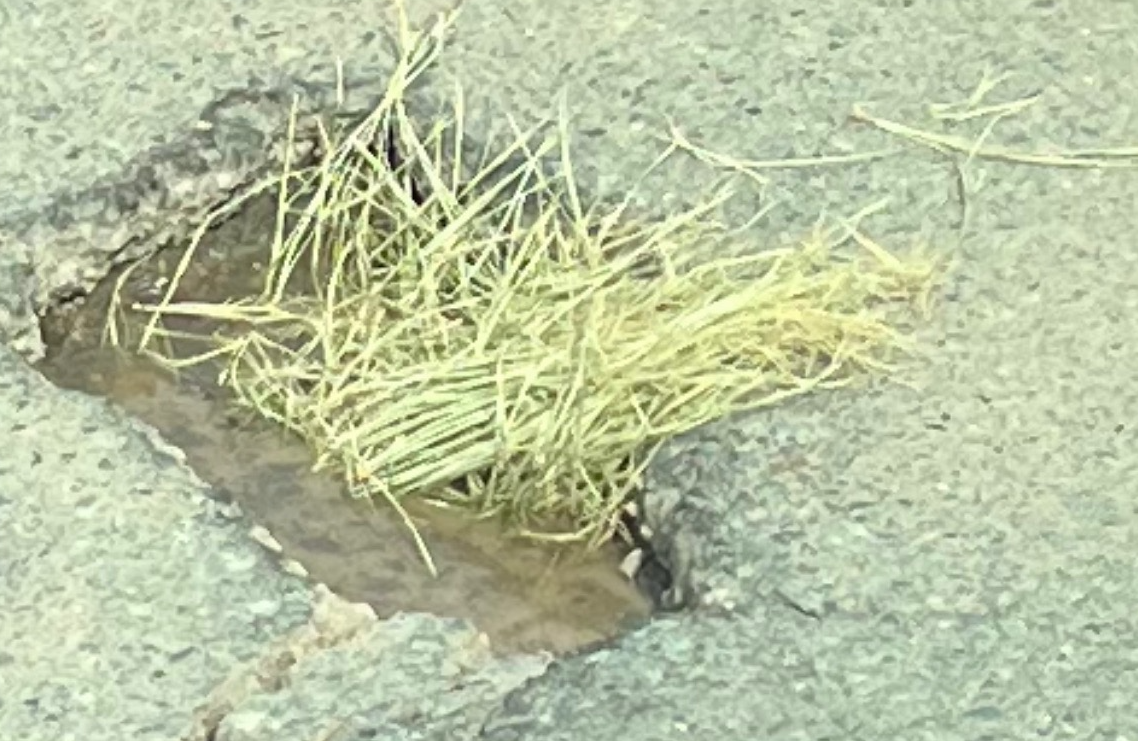

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

**Please use collection time: Friday**

# Overview

We looked at salary per zip code, population per zip code, as well as the sentiment left behind when a pothole was reported in regards to the length of how long a pothole was fixed. By using linear regression (for salary and population in relation to case age), and using ANOVA and a bar graph analysis for sentiment analysis when analyzing significance, we found that neither salary nor population had a statistically significant correlation, however, **sentiment did have a statistically significant correlation, where neutral reports were filled the fastest.**

# Names

- Erica Chen
- Patrick Chiang
- John Driscoll
- Sruthi Papanasa
- Jenelle Truong

<a id='research_question'></a>
# Research Question

### What affects how fast potholes get fixed in San Diego?
#### Does the median income of the San Diego zip code affect how fast the pothole gets fixed?
#### Does population of the San Diego zip code affect how fast the pothole gets fixed?
#### Does the sentiment of the comment made affect how soon the pothole gets fixed?

<a id='background'></a>

## Background & Prior Work

If you frequently drive in San Diego, you know that the roads are riddled with potholes. The severity and frequency of these potholes significantly decrease the driving experience of the city. We would like to research what factors influence San Diego’s prioritization of pothole repairs.
Previous work \[1] has looked at the correlation of socioeconomics on potholes as well as how bus stops and parking meters relate to potholes. They looked at the relation between these aspects and the number of potholes, as well as the turnaround time. They learned that the correlation between socioeconomics and turnaround time was not significant.

This article \[2] looked at potholes in general across the United States, and due to lack of pothole reporting, they used Twitter data to measure the amount of potholes in different cities by looking at the number of tweets for each of them. Key takeaways were that East Coast metropolitan states and California have the most amount of potholes. However, it also may be the case that more people use Twitter in these states and voice their complaints on the platform.



References (include links):

1) https://github.com/COGS108/FinalProjects-Sp17/blob/master/087-FinalProject.ipynb 

2) https://theclunkerjunker.com/blog/which-cities-have-the-most-pothole-complaints/ 

# Hypothesis


Our hypothesis is that zip codes with higher income will get their potholes fixed faster. We think this because people with higher incomes would be more likely to live in nicer areas and the City would be more inclined to keep the streets free of potholes to sustain the high neighborhood value.

We also believe that zip codes with higher populations will get their potholes fixed faster. Since these areas are more highly populated, more people may be affected by the presence of potholes and the City may recognize that fixing these potholes faster will lead to the happiness of a greater number of their constituents.

Regarding the sentiment analysis of the requests to fix potholes, we believe that more negative requests leads to faster repair of potholes. Longer descriptions may provide more insight into where exactly the pothole is located. Meanwhile, negative tones used in the pothole complaints may lead to a greater sense of urgency for the City to repair.


# Datasets

Pothole Repair Requests (Get It Done) (~13000 Observations)

https://data.sandiego.gov/datasets/gid-pothole/ 

Streets Repair Projects (~2600 Observations)

https://data.sandiego.gov/datasets/streets-repair-projects/

San Diego Median Income by Zipcode (38 Observations)

https://data.sandiego.gov/datasets/streets-repair-projects/

The first dataset is sourced from the City of San Diego and describes pothole repair requests made from 2017 to 2023 via phone submission, and the Get It Done app. We sourced another dataset from the City of San Diego that details all completed and upcoming street repairs conducted by the City of San Diego since 2013. The third dataset looks at the zip codes in San Diego County and the median income in each zip code area.

‘IAMFLOC’ connects the two datasets and a column can be made to state whether or not a pothole has been processed as a street repair project. Using the original pothole repair request dataset, we would add a boolean column relating to whether or not it exists in the street repair projects dataset.

*More about the limitations of our data are included in the discussion section.*

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.listdir('/content/drive/Shareddrives/COGS 108 Final Project/Data')

In [ ]:
pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/get_it_done_311_requests_dictionary_datasd.csv')

# Data Cleaning

### Data Cleaning Steps:

1. Updating column datatypes, and making them compatible with one another
2. Removing columns with no information
3. Filling any missing unique functional location values with functional location values

*FLOC stands for functional location but varies throughout different years as FLOC was updated to IAMFLOC. IAMFLOC is the true functional location so we replace any missing IAMFLOC values with backwards compatible FLOC values.*

4. Dropping potholes with no necessary location data
4. Getting a subset of necessary columns
5. Merging descriptions of potholes for each pothole, and redacting any personally identifiable information
6. Creating a merged dataframe that contains a single report for every pothole filled
7. Creating a final merged dataframe that includes zipcodes, population for each zipcode, and household median income for each zipcode


### Data Cleaning:


In [ ]:
pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/get_it_done_311_requests_dictionary_datasd.csv')

field                                        description  \
0    service_request_id  A unique identifier for each request that also...   
1    requested_datetime  The date and time when the service request was...   
2      updated_datetime  The date and time when the service request was...   
3          service_name                   Name of the service request type   
4      case_record_type  A higher-level grouping of service names that ...   
5     specify_the_issue  Detail on the type of illegal dumping service ...   
6                status           The current state of the service request   
7                   lat                      Latitude for request location   
8                  long                     Longitude for request location   
9              district              Council district for request location   
10          case_origin  Method by which the requestor submitted the re...   
11  referred_department  When a case has a status of closed-referred, t...   

                                      possible_values  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                        See list of services dataset  
4   DSD: Development Services Department; ESD Comp...  
5                                                 NaN  
6   New; Assigned; Duplicate; Closed; Closed-Referred  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN

In [ ]:
potholes = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/get_it_done_pothole_requests_datasd_v1.csv')
display(potholes.head())
potholes.shape[0]

service_request_id  service_request_parent_id  sap_notification_number  \
0              131444                        NaN             4.030010e+10   
1             2403110                  2401124.0                      NaN   
2             2403347                  2403345.0                      NaN   
3             2406519                  2401124.0                      NaN   
4             2418337                  2418290.0                      NaN   

        date_requested  case_age_days case_record_type service_name  \
0  2017-01-09T16:22:00         1738.0              TSW      Pothole   
1  2018-09-18T14:39:00          930.0              TSW      Pothole   
2  2018-09-18T18:27:00         1130.0              TSW      Pothole   
3  2018-09-22T10:54:00          926.0              TSW      Pothole   
4  2018-10-08T14:15:00         1607.0              TSW      Pothole   

   service_name_detail date_closed      status  ...  zipcode  \
0                  NaN  2021-10-13      Closed  ...  92110.0   
1                  NaN  2021-04-05      Closed  ...  92120.0   
2                  NaN  2021-10-22      Closed  ...  92139.0   
3                  NaN  2021-04-05      Closed  ...  92120.0   
4                  NaN         NaN  In Process  ...  92037.0   

   council_district comm_plan_code          comm_plan_name  park_name  \
0               2.0           30.0               Peninsula        NaN   
1               9.0           38.0            College Area        NaN   
2               4.0           44.0  Skyline-Paradise Hills        NaN   
3               7.0           20.0                  Navajo        NaN   
4               1.0           10.0                La Jolla        NaN   

   case_origin referred        iamfloc           floc  \
0          Web      NaN  SS-003583-PV1  SS-003583-PV1   
1        Phone      NaN  SS-007582-PV1  SS-007582-PV1   
2          Web      NaN  SS-024890-PV1  SS-024890-PV1   
3       Mobile      NaN  SS-007582-PV1  SS-007582-PV1   
4          Web      NaN  SS-010104-PV1  SS-010104-PV1   

                                  public_description  
0  the entire street is a pothole, and has been f...  
1  TWO POTHOLES COLLEGE AV  N BETWEEN I 8 & CAPRI...  
2  I have submitted multiple requests! Potholes d...  
3  Southbound Lanes of College approaching I-8 we...  
4  This street also has many grooves and potholes...  

[5 rows x 23 columns]

39917

In [ ]:
potholes.columns

Index(['service_request_id', 'service_request_parent_id',
       'sap_notification_number', 'date_requested', 'case_age_days',
       'case_record_type', 'service_name', 'service_name_detail',
       'date_closed', 'status', 'lat', 'lng', 'street_address', 'zipcode',
       'council_district', 'comm_plan_code', 'comm_plan_name', 'park_name',
       'case_origin', 'referred', 'iamfloc', 'floc', 'public_description'],
      dtype='object')

In [ ]:
print(potholes['public_description'].values[1:10])

['TWO POTHOLES COLLEGE AV  N BETWEEN I 8 & CAPRI RIGHT LANE'
 'I have submitted multiple requests! Potholes damaging tires and vehicles. Street needs to be repaved! Please send a supervisor to evaluate the street!'
 'Southbound Lanes of College approaching I-8 westbound to ramp'
 'This street also has many grooves and potholes that need filling and repaving.'
 'Foot of maple canyon' 'Potholes on Southbound Mercury St at Balboa Ave.'
 'Across the street from the Police Museum several potholes going NORTH'
 'Left side of left lane. Aprox 10 feet before intersection. Large pothole.'
 'Intersection of rolando and university ave horrible dip after handicap ramps were put in please fix']


#### Importing Paving DF

In [ ]:
pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/sd_paving_dictionary_datasd.csv')

Field                                        Description  \
0       PVE_ID                                  Pavement Event ID   
1       SEG_ID                                  Segment ID in SAP   
2    PROJECTID                                         Project ID   
3        TITLE                                      Project Title   
4           PM                             Project manager E-Mail   
5     PM_PHONE                              Project Manager Phone   
6        START  This field includes the PROJECT scheduled star...   
7          END  This field includes the PROJECT scheduled end ...   
8   MORATORIUM  When the street went into moratorium - when th...   
9       STATUS  The current status of the job on the street se...   
10        TYPE      Type of work the last pavement event executed   
11      LENGTH                          Length of segment in feet   
12       WIDTH                           Width of segment in feet   

    Possible values  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9               NaN  
10              NaN  
11              NaN  
12              NaN

In [ ]:
paving = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/sd_paving_datasd_v1.csv')
display(paving.head())
paving.shape[0]

In [ ]:
display(potholes['iamfloc'].isin(paving['iamfloc']).value_counts())
potholes['iamfloc'].isin(paving['iamfloc']).value_counts(normalize=True)

False    25677
True     14240
Name: iamfloc, dtype: int64

False    0.64326
True     0.35674
Name: iamfloc, dtype: float64

About 1/3 of the functional locations potholes were reported at had paving work done at them.

In [ ]:
(potholes['iamfloc'].value_counts() > 1).sum() / potholes.shape[0]

0.11902197058897211

Potholes were reported at the same location they'd already been reported 11% of the time

In [ ]:
salaries = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/san diego median income by zipcode.csv')
display(salaries.head())
salaries.shape[0]

zip  household_median_income
0  92014                   155531
1  92025                    58273
2  92027                    65989
3  92037                   109194
4  92071                    87334

37

In [ ]:
potholes.isna().mean()

service_request_id           0.000000
service_request_parent_id    0.658015
sap_notification_number      0.374953
date_requested               0.000000
case_age_days                0.000000
case_record_type             0.000000
service_name                 0.000000
service_name_detail          1.000000
date_closed                  0.044968
status                       0.000000
lat                          0.000025
lng                          0.000025
street_address               0.000125
zipcode                      0.004484
council_district             0.000225
comm_plan_code               0.000351
comm_plan_name               0.000351
park_name                    0.991683
case_origin                  0.000000
referred                     0.974247
iamfloc                      0.012025
floc                         0.012401
public_description           0.014731
dtype: float64

In [ ]:
#fill any null iamfloc values with corresponding floc
potholes.loc[~(potholes['iamfloc'] == potholes['floc']) & potholes['iamfloc'].isna(), 'iamfloc'] = potholes.loc[~(potholes['iamfloc'] == potholes['floc']) & potholes['iamfloc'].isna(), 'floc']

In [ ]:
(potholes['iamfloc'] == potholes['floc']).value_counts(dropna=False)

True     38038
False     1879
dtype: int64

In [ ]:
potholes.drop(columns=['service_name_detail', 'floc', ], inplace=True)

In [ ]:
potholes = potholes.astype({'date_requested': 'datetime64', 'case_age_days': int, 'date_closed': 'datetime64'})

In [ ]:
#drop potholes with no necessary location data
potholes.dropna(subset=['lat', 'lng', 'zipcode', 'iamfloc'], inplace = True)

In [ ]:
#get subset of necessary columns
potholes = potholes[['service_request_id',  'status', 'date_requested', 
                     'date_closed', 'case_age_days', 'zipcode', 'iamfloc', 
                     'case_origin', 'public_description']]
potholes = potholes.astype({'zipcode': int})
potholes.head()

In [ ]:
paving = paving[['task_id', 'iamfloc', 'status', 'project_type', 'date_start', 'date_end']]

# Data Analysis & Results

In [ ]:
paving['project_type'].value_counts()

Slurry            17711
Overlay            2935
Resurfacing         791
Concrete            153
Reconstruction       29
Name: project_type, dtype: int64

In [ ]:
paving = paving.astype({'date_start': 'datetime64', 'date_end':'datetime64'})

In [ ]:
locations_paved = potholes.merge(paving, how='inner', on='iamfloc')

In [ ]:
(locations_paved['date_requested'] < locations_paved['date_end']).value_counts()

False    8582
True     7715
dtype: int64

7715 potholes were filled after they were reported.
967 potholes were reported during a "construciton period" at a given location

In [ ]:
potholes_paved = locations_paved[(locations_paved['date_requested'] < locations_paved['date_end'])]
potholes_paved.head()

service_request_id status_x      date_requested date_closed  case_age_days  \
0             2403110   Closed 2018-09-18 14:39:00  2021-04-05            930   
1             2406519   Closed 2018-09-22 10:54:00  2021-04-05            926   
2             3230037   Closed 2021-02-03 06:53:00  2021-02-19             16   
3             3230038   Closed 2021-02-03 06:53:00  2021-02-19             16   
4             3232452   Closed 2021-02-04 15:47:00  2021-02-19             15   

   zipcode        iamfloc case_origin  \
0    92120  SS-007582-PV1       Phone   
1    92120  SS-007582-PV1      Mobile   
2    92120  SS-007582-PV1      Mobile   
3    92120  SS-007582-PV1      Mobile   
4    92120  SS-007582-PV1      Mobile   

                                  public_description  task_id status_y  \
0  TWO POTHOLES COLLEGE AV  N BETWEEN I 8 & CAPRI...   154547   DESIGN   
1  Southbound Lanes of College approaching I-8 we...   154547   DESIGN   
2  Please fix all the potholes on College Ave nex...   154547   DESIGN   
3  DANGEROUS POTHOLES ON BOTH SIDES OF COLLEGE AV...   154547   DESIGN   
4          Big 2ft wide pothole a couple inches deep   154547   DESIGN   

  project_type date_start   date_end  
0      Overlay 2023-07-01 2023-12-01  
1      Overlay 2023-07-01 2023-12-01  
2      Overlay 2023-07-01 2023-12-01  
3      Overlay 2023-07-01 2023-12-01  
4      Overlay 2023-07-01 2023-12-01

In [ ]:
potholes_paved['iamfloc'].unique().shape[0]

1397

potholes were only paved at 1397 unique locations

In [ ]:
potholes_paved = potholes_paved.sort_values(by='date_requested').drop_duplicates(subset=['iamfloc'])
potholes_paved

potholes paved contains a single report for every pothole filled

unique potholes paved groupby iamfloc and end date

In [ ]:
salaries = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/san diego median income by zipcode.csv')
salaries.head()

zip  household_median_income
0  92014                   155531
1  92025                    58273
2  92027                    65989
3  92037                   109194
4  92071                    87334

In [ ]:
unique_potholes = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/unique_potholes_paved.csv')
display(unique_potholes.shape)
unique_potholes.head()

In [ ]:
unique_potholes['zipcode'].isna().sum()

0

omitting 8 potholes whose zipcodes weren't in salaries

In [ ]:
unique_w_salaries = unique_potholes.merge(salaries, left_on='zipcode', right_on='zip', how='left')
unique_w_salaries

Unnamed: 0.26  Unnamed: 0.25  Unnamed: 0.24  Unnamed: 0.23  \
0                 0              0              0              0   
1                 1              1              1              1   
2                 2              2              2              2   
3                 3              3              3              3   
4                 4              4              4              4   
...             ...            ...            ...            ...   
4565           4565           4565           4565           4565   
4566           4566           4566           4566           4566   
4567           4567           4567           4567           4567   
4568           4568           4568           4568           4568   
4569           4569           4569           4569           4569   

      Unnamed: 0.22  Unnamed: 0.21  Unnamed: 0.20  Unnamed: 0.19  \
0                 0              0              0              0   
1                 1              1              1              1   
2                 2              2              2              2   
3                 3              3              3              3   
4                 4              4              4              4   
...             ...            ...            ...            ...   
4565           4565           4565           4565           4565   
4566           4566           4566           4566           4566   
4567           4567           4567           4567           4567   
4568           4568           4568           4568           4568   
4569           4569           4569           4569           4569   

      Unnamed: 0.18  Unnamed: 0.17  ...  project_type     project_status  \
0                 0              0  ...        Slurry  POST CONSTRUCTION   
1                 1              1  ...       Overlay       CONSTRUCTION   
2                 2              2  ...       Overlay       CONSTRUCTION   
3                 3              3  ...       Overlay       CONSTRUCTION   
4                 4              4  ...       Overlay       CONSTRUCTION   
...             ...            ...  ...           ...                ...   
4565           4565           4565  ...       Overlay       CONSTRUCTION   
4566           4566           4566  ...       Overlay       CONSTRUCTION   
4567           4567           4567  ...       Overlay       CONSTRUCTION   
4568           4568           4568  ...        Slurry       CONSTRUCTION   
4569           4569           4569  ...           NaN             DESIGN   

      project_date_start  project_date_end  vader_neg  vader_neu  vader_pos  \
0             2022-06-02        2022-06-02     0.0000     1.0000     0.0000   
1             2022-08-26        2023-08-30     0.1413     0.8587     0.0000   
2             2022-08-26        2023-08-30     0.1377     0.8550     0.0072   
3             2022-08-26        2023-08-30     0.3247     0.6753     0.0000   
4             2022-08-26        2023-08-30     1.0000     0.0000     0.0000   
...                  ...               ...        ...        ...        ...   
4565          2022-10-04        2023-08-10     0.0305     0.9065     0.0630   
4566          2022-10-04        2023-08-10     0.0546     0.9330     0.0124   
4567          2022-10-04        2023-08-10     0.0000     1.0000     0.0000   
4568          2022-08-15        2023-02-24     0.3230     0.6770     0.0000   
4569          2023-08-15        2025-06-05     0.0000     1.0000     0.0000   

      vader_compound      zip  household_median_income  
0             0.0000  92103.0                  78720.0  
1             0.0000  92103.0                  78720.0  
2             0.0196  92103.0                  78720.0  
3             0.0000  92103.0                  78720.0  
4            -0.0227  92103.0                  78720.0  
...              ...      ...                      ...  
4565          0.0042  92126.0                  96915.0  
4566          0.0000  92126.0                  96915.0

In [ ]:
unique_w_salaries.to_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/unique_w_salary.csv')

In [ ]:
potholes_paved = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/unique_w_salary.csv')

In [ ]:
potholes = potholes_paved[['case_age_days', 'zipcode', 'household_median_income', 'population', 'vader_compound', 'num_requests']].copy()
potholes['zipcode'] = potholes['zipcode'].astype(str)

In [ ]:
import json

In [ ]:
with open('/content/drive/Shareddrives/COGS 108 Final Project/Data/Zip Codes.geojson', 'r') as jsonfile:
    data = json.load(jsonfile)
tmp = data

In [ ]:
#keep only the zipcodes we have data for
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['zip'] in list(potholes['zipcode'].unique()):
        geozips.append(tmp['features'][i])
    
new_json = dict.fromkeys(['type', 'features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

open('/content/drive/Shareddrives/COGS 108 Final Project/Data/sd-zips.json', 'w').write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': '))
)

5779414

In [ ]:
import plotly.express as px

sd_geo = '/content/drive/Shareddrives/COGS 108 Final Project/Data/sd-zips.json'

df = potholes.groupby('zipcode').mean().reset_index()
with open(sd_geo) as geo:
    geojson = json.load(geo)

def create_choropleth(df, y, colors):
    fig = px.choropleth_mapbox(df, geojson=geojson, color=y,
                            locations="zipcode", featureidkey="properties.zip",
                            center={"lat": 32.85, "lon": -117.1611},
                            mapbox_style="carto-positron", zoom=8.75,
                            color_continuous_scale = colors, opacity = 0.8,
                            title='Mean {} by Zipcode'.format(y))
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

#Data Analysis & Results (EDA)

### Sentiment Analysis

In [ ]:
!pip install contractions
import contractions
import nltk

nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk import tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
potholes_paved['public_description'] = potholes_paved['public_description'].fillna('')
potholes_paved['public_description'].isnull().values.any()

False

In [ ]:
# preprocessing text for sentiment analysis
# expand contractions prior to stopword removal
potholes_paved['preprocessed_public_desc'] = potholes_paved['public_description'].apply(contractions.fix)

In [ ]:
# remove all punctuation from text
tokenizer = RegexpTokenizer(r'\w+')
potholes_paved['preprocessed_public_desc'] = potholes_paved['preprocessed_public_desc'].apply(tokenizer.tokenize)

In [ ]:
# remove all stopwords, including pronouns
stopwords = nltk.corpus.stopwords.words('english')

potholes_paved['preprocessed_public_desc'] = potholes_paved['preprocessed_public_desc'].apply(lambda x: [token for token in x if token not in stopwords])

In [ ]:
ps = nltk.stem.PorterStemmer()
potholes_paved['preprocessed_public_desc'] = potholes_paved['preprocessed_public_desc'].apply(lambda x: [ps.stem(token) for token in x])

In [ ]:
potholes_paved['preprocessed_public_desc'].head()

12159    [multipl, pothol, damag, pavement, 4800, 4900,...
12571    [thi, addendum, origin, report, multipl, potho...
0        [two, pothol, colleg, av, n, between, i, 8, ca...
218      [i, submit, multipl, request, pothol, damag, t...
264      [intersect, rolando, univers, ave, horribl, di...
Name: preprocessed_public_desc, dtype: object

<ipython-input-56-da87e0364080>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mostFreq = potholes_paved['preprocessed_public_desc'].apply(pd.Series).stack()


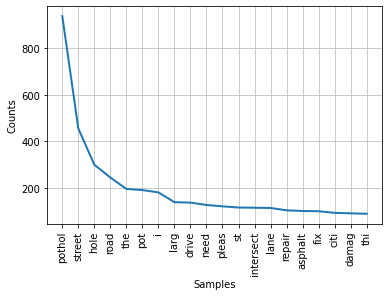

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# examine the most frequent words after stemming
mostFreq = potholes_paved['preprocessed_public_desc'].apply(pd.Series).stack()
mostFreqDist = FreqDist(mostFreq)
mostFreqDist.plot(20, cumulative=False)

As expected, pothole is the most common word in the descriptions.

In [ ]:
# obtain averaged sentiment analysis scores through Vader
# pre-processing data may eliminate modifiers that would impact sentiment

analyzer = SentimentIntensityAnalyzer()
negVals = []
neuVals = []
posVals = []
compoundVals = []
unique_potholes = pd.read_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/unique_potholes_paved.csv')
unique_potholes.head()

In [ ]:
# vader analyzes on a sentence 
def avgSentimentScores():
  for post in unique_potholes['all_public_descriptions']:
    tokenizedSelfText = tokenize.sent_tokenize(post)
    avgNeg = 0.0
    avgNeu = 0.0
    avgPos = 0.0
    avgCompound = 0.0
    nonEmptyDescCount = 0
    for sentence in tokenizedSelfText:
      if sentence != 'nan.':
        nonEmptyDescCount += 1
        scores = analyzer.polarity_scores(sentence)
        avgNeg += scores['neg']
        avgNeu += scores['neu']
        avgPos += scores['pos']
        avgCompound = scores['compound']
    if nonEmptyDescCount != 0:
      avgNeg = round(avgNeg / nonEmptyDescCount, 4)
      avgNeu = round(avgNeu / nonEmptyDescCount, 4)
      avgPos = round(avgPos / nonEmptyDescCount, 4)
      avgCompound = round(avgCompound / nonEmptyDescCount, 4)
    
    negVals.append(avgNeg)
    neuVals.append(avgNeu)
    posVals.append(avgPos)
    compoundVals.append(avgCompound)
  
  unique_potholes['vader_neg'] = negVals
  unique_potholes['vader_neu'] = neuVals
  unique_potholes['vader_pos'] = posVals
  unique_potholes['vader_compound'] = compoundVals

In [ ]:
avgSentimentScores()

In [ ]:
unique_potholes.to_csv('/content/drive/Shareddrives/COGS 108 Final Project/Data/unique_potholes_paved.csv')

In [ ]:
unique_potholes.describe()

Unnamed: 0.26  Unnamed: 0.25  Unnamed: 0.24  Unnamed: 0.23  \
count    4570.000000    4570.000000    4570.000000    4570.000000   
mean     2284.500000    2284.500000    2284.500000    2284.500000   
std      1319.389695    1319.389695    1319.389695    1319.389695   
min         0.000000       0.000000       0.000000       0.000000   
25%      1142.250000    1142.250000    1142.250000    1142.250000   
50%      2284.500000    2284.500000    2284.500000    2284.500000   
75%      3426.750000    3426.750000    3426.750000    3426.750000   
max      4569.000000    4569.000000    4569.000000    4569.000000   

       Unnamed: 0.22  Unnamed: 0.21  Unnamed: 0.20  Unnamed: 0.19  \
count    4570.000000    4570.000000    4570.000000    4570.000000   
mean     2284.500000    2284.500000    2284.500000    2284.500000   
std      1319.389695    1319.389695    1319.389695    1319.389695   
min         0.000000       0.000000       0.000000       0.000000   
25%      1142.250000    1142.250000    1142.250000    1142.250000   
50%      2284.500000    2284.500000    2284.500000    2284.500000   
75%      3426.750000    3426.750000    3426.750000    3426.750000   
max      4569.000000    4569.000000    4569.000000    4569.000000   

       Unnamed: 0.18  Unnamed: 0.17  ...  Unnamed: 0.1  Unnamed: 0.1.1  \
count    4570.000000    4570.000000  ...   4570.000000     4570.000000   
mean     2284.500000    2284.500000  ...   2284.500000     2284.500000   
std      1319.389695    1319.389695  ...   1319.389695     1319.389695   
min         0.000000       0.000000  ...      0.000000        0.000000   
25%      1142.250000    1142.250000  ...   1142.250000     1142.250000   
50%      2284.500000    2284.500000  ...   2284.500000     2284.500000   
75%      3426.750000    3426.750000  ...   3426.750000     3426.750000   
max      4569.000000    4569.000000  ...   4569.000000     4569.000000   

            zipcode  case_age_days  num_requests        task_id    vader_neg  \
count   4570.000000     4570.00000   4570.000000    4570.000000  4570.000000   
mean   92108.795186       17.70919     23.432604  218149.029978     0.057424   
std       25.771418       71.75289     57.001917  127345.665891     0.123276   
min    92014.000000        0.00000      1.000000  105160.000000     0.000000   
25%    92104.000000        2.00000      7.000000  133314.000000     0.000000   
50%    92111.000000        5.00000     11.000000  151093.000000     0.000000   
75%    92120.000000       15.00000     20.000000  423207.000000     0.064225   
max    92182.000000     1172.00000   1476.000000  426928.000000     1.000000   

         vader_neu    vader_pos  vader_compound  
count  4570.000000  4570.000000     4570.000000  
mean      0.911498     0.030237       -0.012472  
std       0.144813     0.079425        0.134281  
min       0.000000     0.000000       -0.999700  
25%       0.855700     0.000000        0.000000  
50%       1.000000     0.000000        0.000000  
75%       1.000000     0.000000        0.000000  
max       1.000000     0.697000        0.999200  

[8 rows x 36 columns]

###Correlation between Household Median Income and Case Age 

(0.0, 100.0)

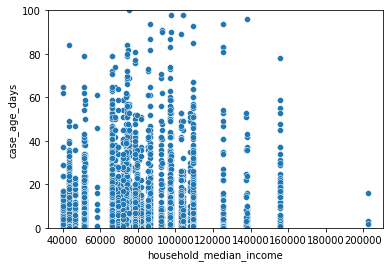

In [ ]:
df2 = unique_w_salaries[['household_median_income', 'case_age_days']] 
import patsy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
outcome_1, predictors_1 = patsy.dmatrices('household_median_income ~ case_age_days', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

fig, ax = plt.subplots()
sns.scatterplot(x='household_median_income', y='case_age_days', data=unique_w_salaries, ax=ax)
plt.xlabel('household_median_income')
plt.ylabel('case_age_days')
ax.set_ylim(0, 100)


There does not appear to be a linear correlation betwen household median income and case age.

###Longest case age days by zipcode

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

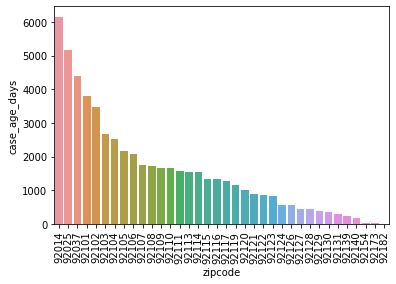

In [ ]:
#longest case age days by zipcode
dat = potholes_paved.groupby('zipcode').sum()[['case_age_days']]
dat = dat.reset_index()
ax = sns.barplot(data= dat, x='zipcode', y='case_age_days', order = dat.sort_values('case_age_days', ascending = False).zipcode)
ax = ax.set_xticklabels(dat['zipcode'].tolist(), rotation=90)

We first decided to look at the total case age days by zip code and we did this by taking the sum of all the case age days per zip code. Case age day is defined as how long the case took from opening to closing to we wanted to see how they differ across different zip codes. After sorting the chart, we see that zip code 92014 has the highest sum of case age days. This may have been due to the fact that this zip code simply may just have more potholes so in the next plot we look at the mean case age days.

###Mean case age by zip code

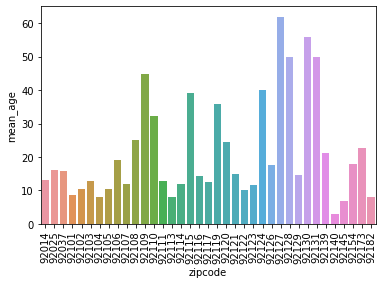

In [ ]:
#mean case age by zip code

zipcode_groups = unique_w_salaries.groupby(by='zipcode').agg(mean_age=('case_age_days', 'mean'), med_income=('household_median_income', 'median'))
zipcode_groups = zipcode_groups.reset_index()

ax = sns.barplot(x='zipcode', y='mean_age', data=zipcode_groups)

ax = ax.set_xticklabels(zipcode_groups['zipcode'].tolist(), rotation=90)


We plotted the zipcodes against the average case days for each zip code. This was accomplished by grouping the potholes together by zipcode and aggregating the mean case age days. From this plot we can see that there is a large variance in the average case age from zipcode to zipcode. The lowest average case age is 3.0 for zipcode 92140 and the highest average case age is 61.89 for zipcode 92127. **Zipcode by itself is not ordered in anyway so we cannot determine a relationship. So, in the following scatter plot we have the median income of each zipcode against mean case age, and in a separate plot the data visualized as a choropleth.**

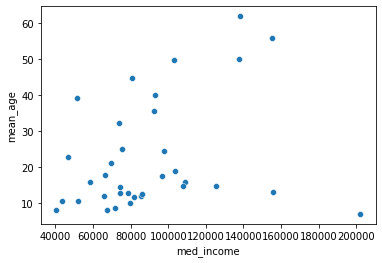

In [ ]:
ax = sns.scatterplot(x='med_income', y='mean_age', data=zipcode_groups)

This scatter plot indicates that the median income of each zipcode does not have a relationship with the mean case age, as there is no trend to be observed here.

###Visualization of Vader Score Distributions

<Axes: xlabel='vader_group', ylabel='mean_age'>

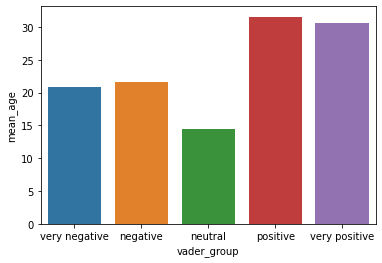

In [ ]:
conditions = [
    (unique_potholes['vader_compound'] <= -0.5),
    (unique_potholes['vader_compound'] > -0.5) & (unique_potholes['vader_compound'] < 0),
    (unique_potholes['vader_compound'] == 0),
    (unique_potholes['vader_compound'] > 0) & (unique_potholes['vader_compound'] <= 0.5),
    (unique_potholes['vader_compound'] > 0.5)
    ]

values = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

unique_potholes['vader_group'] = np.select(conditions, values)

vader_groups = unique_potholes.groupby(by='vader_group').agg(mean_age=('case_age_days', 'mean'))
vader_groups = vader_groups.reset_index()

sns.barplot(x='vader_group', y='mean_age', order=['very negative', 'negative', 'neutral', 'positive', 'very positive'], data=vader_groups)

Since the Vader compound scores indicate how negative or positive the comments associated with a given pothole are, we examined the mean case age for each sentiment category. The above bar graph indicates that pothole reports that contain neutral descriptions possess the shortest mean case age while those that contain more positive sentiments tend to have a higher mean case age.

To visualize the relationship between case age and compound Vader scores, we generated the scatterplot below and excluded outliers in terms of extremely long case ages. Most pothole descriptions possess more neutral sentiment rather than extreme positive or negative sentiments. Overall, the scatterplot does not convey a particular relationship between case age and Vader score.

(0.0, 100.0)

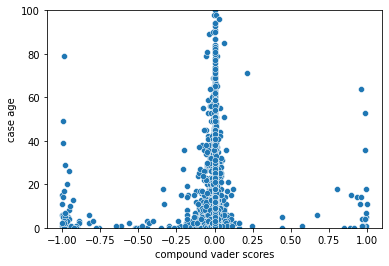

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x='vader_compound', y='case_age_days', data=unique_potholes, ax=ax)
plt.xlabel('compound vader scores')
plt.ylabel('case age')
ax.set_ylim(0, 100)

Vader Score Analysis

In [ ]:
import random
from scipy.stats import f_oneway

To examine if there is a statistically significant difference between the Vader groups, we conduct One-way ANOVA analysis. First, we rearrange a subset of our data to reflect our groups of interest.

In [ ]:
vader_subset = pd.DataFrame({value:unique_potholes[unique_potholes['vader_group'] == value]['case_age_days'] for value in values})
vader_subset.head()

very negative  negative  neutral  positive  very positive
0            NaN       NaN     52.0       NaN            NaN
1            NaN       NaN     10.0       NaN            NaN
2            NaN       NaN      NaN       1.0            NaN
3            NaN       NaN      1.0       NaN            NaN
4            NaN       2.0      NaN       NaN            NaN

In [ ]:
vader_subset.describe()

very negative     negative      neutral     positive  very positive
count      64.000000   744.000000  3228.000000   509.000000      25.000000
mean       20.828125    21.577957    14.473048    31.554028      30.560000
std        95.878321    85.983797    51.487133   129.635754      94.018651
min         0.000000     0.000000     0.000000     0.000000       0.000000
25%         1.000000     2.000000     2.000000     1.000000       1.000000
50%         2.000000     5.000000     5.000000     6.000000       6.000000
75%         7.000000    16.000000    14.000000    18.000000      15.000000
max       757.000000  1058.000000   944.000000  1172.000000     475.000000

Some of the assumptions of ANOVA is samples shoulds be randomly selected and should be close to Gaussian Distribution. Therefore, we first need to examine the distribution of the data across the Vader groups.

In [ ]:
np.random.seed(1234)
rand_samp_subset = pd.DataFrame({value:random.sample(list(unique_potholes['case_age_days'][unique_potholes['vader_group'] == value]), 10) for value in values})

In [ ]:
rand_samp_subset

very negative  negative  neutral  positive  very positive
0              0        13       11         4             14
1              1         2        6        32              4
2              0        49       54         1              6
3              0         2       39         3              4
4             79         2        6        11             14
5             49         1        3        11              1
6              3         3        2         1              5
7            142        64       11         3              1
8              2         2        3         2              0
9              2        15        3         5             11

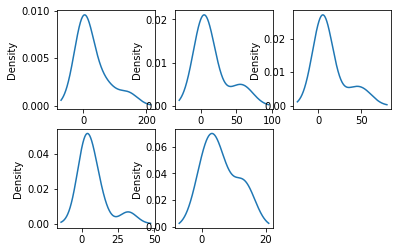

In [ ]:
plt.figure()
for i, value in enumerate(values):
  plt.subplot(2, 3, i+1)
  rand_samp_subset[value].plot.density()

Since the data is not close to a Gaussian distribution, we then apply a log plus 1 transformation on the data since this transformation works with our non-negative data.

In [ ]:
temp_1 = pd.Series(np.log1p(vader_subset['very negative'].dropna().to_numpy()))
temp_2 = pd.Series(np.log1p(vader_subset['negative'].dropna().to_numpy()))
temp_3 = pd.Series(np.log1p(vader_subset['neutral'].dropna().to_numpy()))
temp_4 = pd.Series(np.log1p(vader_subset['positive'].dropna().to_numpy()))
temp_5 = pd.Series(np.log1p(vader_subset['very positive'].dropna().to_numpy()))

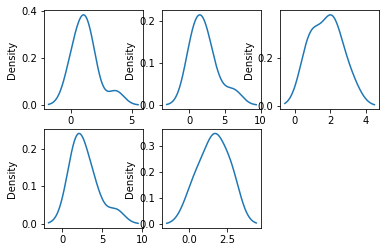

In [ ]:
temps = [temp_1, temp_2, temp_3, temp_4, temp_5]

rand_samp_subset = pd.DataFrame({'very negative':random.sample(temp_1.tolist(), 10), 
                                 'negative':random.sample(temp_2.tolist(), 10),
                                 'neutral':random.sample(temp_3.tolist(), 10), 
                                 'positive':random.sample(temp_4.tolist(), 10),
                                 'very positive':random.sample(temp_5.tolist(), 10)})

plt.figure()
for i, value in enumerate(values):
  plt.subplot(2, 3, i+1)
  rand_samp_subset[value].plot.density()

In [ ]:
statistic, p_val = f_oneway(temp_1, temp_2, temp_3, temp_4, temp_5)
print(f'{statistic} {p_val}')

2.947869946255043 0.01907379378773349


Since our p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant difference among the mean case ages between the Vader groups.

In [ ]:
from scipy.stats import kendalltau

Investigate if the correlation strength between Vader sentiment scores and time needed to fill a reported pothole. 
Here we used Kendall rank correlation, as there is no linear relationship between Vader scores and pothole case age. Thus, we cannot use evaluate the Pearson correlation.

In [ ]:
unique_potholes['vader_group_num'] = unique_potholes['vader_group'].map({condition: i for i, condition in enumerate(values)})
unique_potholes.head()

Unnamed: 0.26  Unnamed: 0.25  Unnamed: 0.24  Unnamed: 0.23  Unnamed: 0.22  \
0              0              0              0              0              0   
1              1              1              1              1              1   
2              2              2              2              2              2   
3              3              3              3              3              3   
4              4              4              4              4              4   

   Unnamed: 0.21  Unnamed: 0.20  Unnamed: 0.19  Unnamed: 0.18  Unnamed: 0.17  \
0              0              0              0              0              0   
1              1              1              1              1              1   
2              2              2              2              2              2   
3              3              3              3              3              3   
4              4              4              4              4              4   

   ...  project_type     project_status  project_date_start  project_date_end  \
0  ...        Slurry  POST CONSTRUCTION          2022-06-02        2022-06-02   
1  ...       Overlay       CONSTRUCTION          2022-08-26        2023-08-30   
2  ...       Overlay       CONSTRUCTION          2022-08-26        2023-08-30   
3  ...       Overlay       CONSTRUCTION          2022-08-26        2023-08-30   
4  ...       Overlay       CONSTRUCTION          2022-08-26        2023-08-30   

   vader_neg  vader_neu  vader_pos  vader_compound  vader_group  \
0     0.0000     1.0000     0.0000          0.0000      neutral   
1     0.1413     0.8587     0.0000          0.0000      neutral   
2     0.1377     0.8550     0.0072          0.0196     positive   
3     0.3247     0.6753     0.0000          0.0000      neutral   
4     1.0000     0.0000     0.0000         -0.0227     negative   

   vader_group_num  
0                2  
1                2  
2                3  
3                2  
4                1  

[5 rows x 46 columns]

In [ ]:
coef, p = kendalltau(unique_potholes['vader_group'], unique_potholes['case_age_days'])
print(f'{coef} {p}')

-0.0025729378959746642 0.8295558191178607


### Mean Case Age by Zipcode

In [ ]:
create_choropleth(df, 'case_age_days', 'reds')

The areas that have the highest mean case age are Poway and rural Rancho Santa Fe / Escondido, as well as Pacific Beach. This is interesting because these areas have some of the lowest amounts of people travelling on them and may not be high priority for the city.

The areas with the lowest mean case age are miramar and areas close to Downtown San Diego.

### Median Annual Salary by Zipcode

In [ ]:
create_choropleth(df, 'household_median_income', 'greens')

It appears that the highest salaried area is Miramar with north county ares having high average salaries as well.

### Relationship between Salary and Mean Case Age

There doesn't seem to be much relationship between median annual salary and case age by comparing the two choropleths above, but it is interesting to note that the area with the lowest case age is the area with the highest reported median salary, Miramar.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: xlabel='household_median_income', ylabel='case_age_days'>

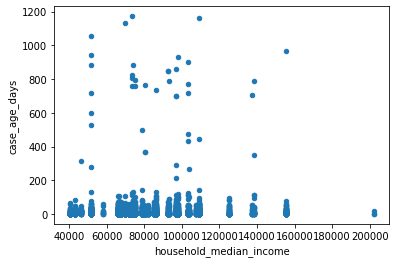

In [ ]:
potholes.plot(kind='scatter', x='household_median_income', y='case_age_days')

There doesn't appear to be a linear relationship between income and case age of filled potholes by just looking at a scatterplot, but we will examine this more deeply in the analysis section.

### Population by Zipcode

In [ ]:
create_choropleth(df, 'population', 'purples')

Population seems roughly evenly distirbuted across the zipcodes we have available for San Diego county, with the exception of Mira Mesa being highly populated, and Mirarmar having a very low population.

### Relationship between Population and Mean Case Age

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: xlabel='population', ylabel='case_age_days'>

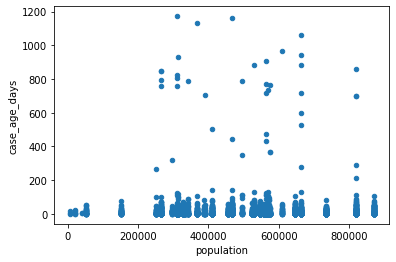

In [ ]:
potholes.plot(kind='scatter', x='population', y='case_age_days')

There also is no apparent relationship between population and case age other than a slight positive relaitonship because most of the higher case ages occur in ares with higher population, but we'll confirm this in the analysis section.

### Average Sentiment by Zipcode

In [ ]:
create_choropleth(df, 'vader_compound', ['blue', 'white', 'yellow'])

###Who writes the nicest reports? 

It appears that Poway area and an area called Ronaldo nearby El Cajon write the most positive reports, while Point Loma seems to have the most negatively worded reviews.

### Correlation between Population of Area by Zipcode and Pothole Case Age in Days

There are outliers so pearsons r not valid statistic here, and the data is not ordinal so can't use spearmanr so we are using kendall tau instead.

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.kendalltau(potholes['population'], potholes['case_age_days'])

SignificanceResult(statistic=0.01420051906756547, pvalue=0.17249383206137203)

There is an extremely slight negative linear correlation between population and case age in days, which according to the large p value can be explained by random chance. **Therefore we cannot conclude that there is a relationship between populaiton and case age in days.**

### Number of Reports vs Case Age

In [ ]:
potholes.columns

Index(['case_age_days', 'zipcode', 'household_median_income', 'population',
       'vader_compound', 'num_requests'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



(0.0, 200.0)

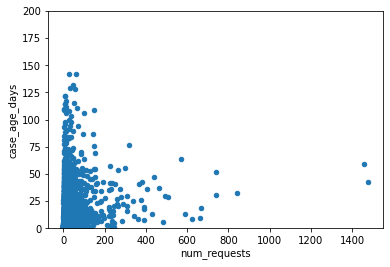

In [ ]:
fig, ax = plt.subplots()
potholes.plot(kind='scatter', x='num_requests', y='case_age_days', ax = ax)
ax.set_ylim(0, 200)

### Correlation between Number of Reports and Pothole Case Age

There are outliers so pearsons r not valid statistic here, and the data is not ordinal so can't use spearmanr so we are using kendall tau instead.

In [ ]:
scipy.stats.kendalltau(potholes['num_requests'], potholes['case_age_days'])

SignificanceResult(statistic=0.18511692235262364, pvalue=8.086894675580952e-72)

Significant positve correlation. Likely that potholes that are around for longer have more requests, so **this test only tells us that there is a confounding factor.**

# Ethics & Privacy

The ethical concerns we identified are as follows:
- Emails are fully visible in public csv, will need to remove and anonymize to protect privacy
- Possible reporting bias, locations in San Diego with more people may report potholes at a higher frequency or overreport the same pothole
- Biased by mostly driving individuals and individuals who have access to the internet making the reports
- No privacy or terms of use in publicly accessible san diego problems dataset
- Knowledge of the reporting process may be limited to individuals familiar with city processes or who have the information distributed in suburban areas, whereas low income areas may be less likely to have received the information.
- Data likely doesn’t exclude specific groups, as everyone has access to the form, but those who drive cars are much more likely to submit.  
- Income dataset will have underreported higher incomes and therefore a lower average income than the true value
- Most of these biases are already known, but we will look at counts of reports for different categories during EDA to determine overreporting, and will state that during analysis.
- We could average reporting by population of each area
- Equitable impact might be prevented by administrative bloat and the US’s subpar governmental bureaucracies 

After identifying and analyzing ethical and privacy concerns in our datasets, we took one major step for de-identifying data to address these outlined privacy concerns. Since some of the written reports from the potholes dataset contained personally identifiable information in the form of email metadata and contents, we removed all reports containing email information, because the inconsistency in the formatting of all these reports made it impossible to extract relevant information related to potholes while maintaining privacy . 

An ethical concern this project interacts with is the identification of factors that could indicate preferential behavior from the government such as population and income. This could have adverse effects and cast the public service agencies in a negative light or affect sentiment towards public officials. Luckily, our data and analysis indicates that these factors did not have a significant impact on the average case age of potholes.

# Conclusion & Discussion

From the data visualizations generated, we concluded that of the different relationships analyzed, sentiment had the most significant correlation in regards to length of case age in San Diego County. When looking at zip codes in San Diego, we found that zip codes weren’t continuous leading us to analyze how salary per zip code factored into the length of the case age. Currently, there was no relationship found between the median income and mean case age. Additionally, we analyzed how population per zip code could potentially affect the length of case age days, but this analysis also returned inconclusive. Thus, our initial hypothesis was proven not statistically significant when conducting statistical analysis between this relationship. However, when investigating sentiment/Vader groups, there was a relationship between neutral sentiment having the least amount of case age days in San Diego County. This relationship was supported by using statistical analysis of one-way ANOVA analysis and the bar graph conparing mean case age to Vader group. 

We encountered four main limitations in our analysis. First, some zip codes within San Diego are not represented within our dataset. In addition, potholes are mainly reported through phone or email or online, thus excluding people who may not have regular access to these technologies from reporting. Therefore, our conclusions may not accurately reflect the reality of the pothole situation throughout San Diego. We also note that many requests do not provide a detailed description of the location of the reported pothole, making it difficult for the City to identify and fix the exact reported pothole. As a result, some of the pothole descriptions reported may be inaccurately linked to one particular pothole case while the reporting party may be referencing a different pothole entirely. The last limitation of our analysis is that we can only make conclusions based on the factors and relationships that we chose to analyze; we cannot conclude whether or not the government has preferential behavior with regards to pothole fixes.



# Video Submission

Youtube link (uploaded to Youtube and updated README with link on 3/21): https://www.youtube.com/watch?v=74F4cPhYke0

Slides link: https://docs.google.com/presentation/d/1Tha74Kg8GX8hpQa75oN1IhSVHrLyk5L2TW9WqiAztNc/edit?usp=sharing

# Team Contributions

Patrick Chiang ran data analysis regarding zip codes, income, and case age. This involved wrangling the data, generating plots, and writing the discussions of findings. He also helped with configuring other plots and contributed to the ethics, privacy, and limitation discussions. 

Erica Chen helped with linear regression analysis for the relationship between median income and case age days, helped generate scatterplots, and contributed to the conclusion write up. Erica also contributed to analysis of regression and performed preliminary analyses of the datasets.

Sruthi Papanasa helped with exploratory data analysis by making multiple plots including the barplot for zip code vs sum case age days and helped write descriptions for exploratory data analysis. Sruthi also helped with compiling notebooks for checkpoints.

Jenelle Truong wrote code for Vader analysis that was applied to all pothole descriptions within the dataset and for ANOVA analysis of the Vader groupings, including plot generation and descriptions. She also helped outline limitations in the final project writeup.  

John Driscoll wrote code for some data cleaning, and created choropleths and other plots and analyzed them for exploratory data analysis. John also contributed to the writing in the ethics, methods, and analysis sections of the project, and ran analysis of multiple correlations.